# Juntar Datos Calidad Aire y Meteo

In [20]:
suppressMessages(library(saqgetr))
suppressMessages(library(ggplot2))

In [21]:
setwd("~/Repositories/AirQualityCOVID/")

source("src/Curation/general.R")

In [22]:
sites <- read.csv("data/Curation/AEMET/checked_sites_AEMET.csv",
                  stringsAsFactor=F)
head(sites)

,latitud,provincia,altitud,indicativo,nombre,indsinop,longitud,dist,siteAQ
,<dbl>,<chr>,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<chr>
1,43.29806,BIZKAIA,42,1082,BILBAO AEROPUERTO,8025,-2.906389,5.756578,es0110a
2,40.41194,MADRID,667,3195,"MADRID, RETIRO",8222,-3.678056,3.195804,es0115a
3,40.41194,MADRID,667,3195,"MADRID, RETIRO",8222,-3.678056,1.137154,es0118a
4,40.41194,MADRID,667,3195,"MADRID, RETIRO",8222,-3.678056,4.417472,es0120a
5,37.41667,SEVILLA,34,5783,SEVILLA AEROPUERTO,8391,-5.879167,7.968651,es0817a
6,37.41667,SEVILLA,34,5783,SEVILLA AEROPUERTO,8391,-5.879167,11.220392,es0890a


In [23]:
site.lv <- levels(as.factor(sites$siteAQ))[1:2]
for (st in site.lv) {
    dataAQ <- read.csv(paste("data/Curation/AirQuality/Values/",
                             st, ".csv", sep="")) %>%
                    data.as.datetime("date", "ymd_hms")%>%
                    data.as.datetime("date_end", "ymd_hms")%>%
                    saq_clean_observations(summary="hour",spread=TRUE)
    
    nameMto <- paste("data/Curation/AEMET/Values/",
                    sites[sites$siteAQ == st, "indicativo"],
                    ".csv", sep="")
    
    if (file.exists(nameMto)) {
        dataMto <- read.csv(nameMto) %>%
                        data.as.datetime("fecha", "ymd") %>%
                        pivot.short.table(a)
        }
    
}

Warning message in names(df) == columns:
"longer object length is not a multiple of shorter object length"


ERROR: Error in match.names(clabs, names(xi)): names do not match previous names


In [17]:
a <- names(dataMto)

Warning message:
"Removed 230 rows containing missing values (geom_point)."


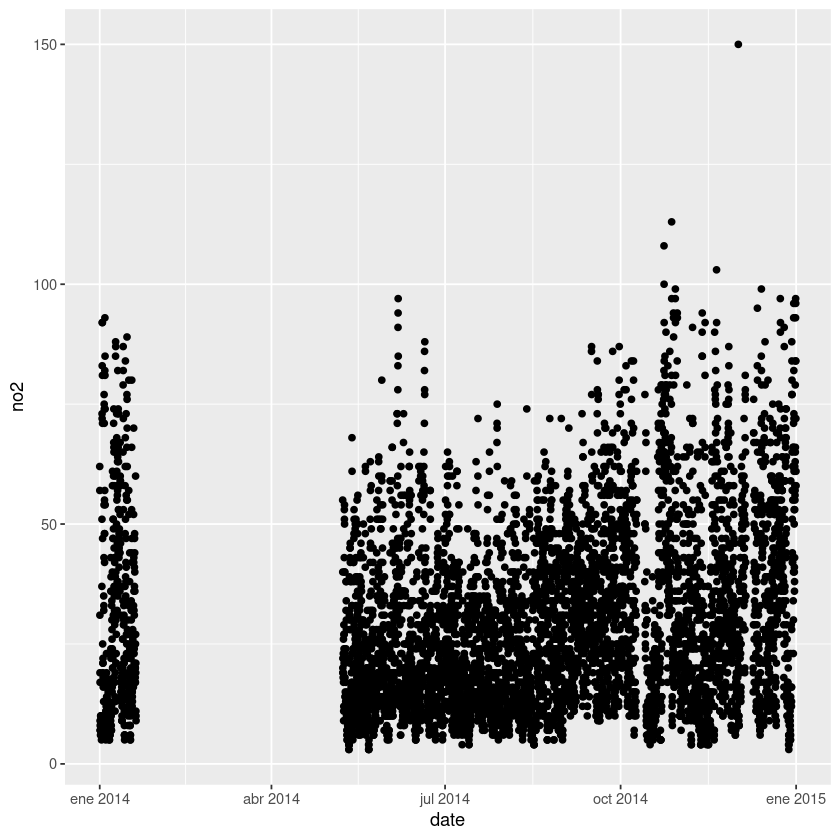

In [39]:
ggplot(dataAQ[year(dataAQ$date) == 2014,], aes(x=date, y=no2)) +
geom_point()